# **Random Signal Analysis. Power Spectrum Estimation - Krzysztof Wąsik**

In this report, we analyze a non-stationary signal whose statistical properties change over time. Specifically, the signal is composed of two segments with different variances.

- **Signal Generation:** Create a non-stationary signal by concatenating two segments of Gaussian noise with different variances.
- **Sliding Window Analysis:** Compute the mean and variance in sliding windows to observe the time-varying statistics.
- **Power Spectral Density (PSD) Estimation:** Use a spectrogram to estimate the PSD over time and visualize how the frequency content evolves.

The aim of this analysis is to illustrate the differences in statistical properties across the signal segments and how these differences are reflected in the PSD.


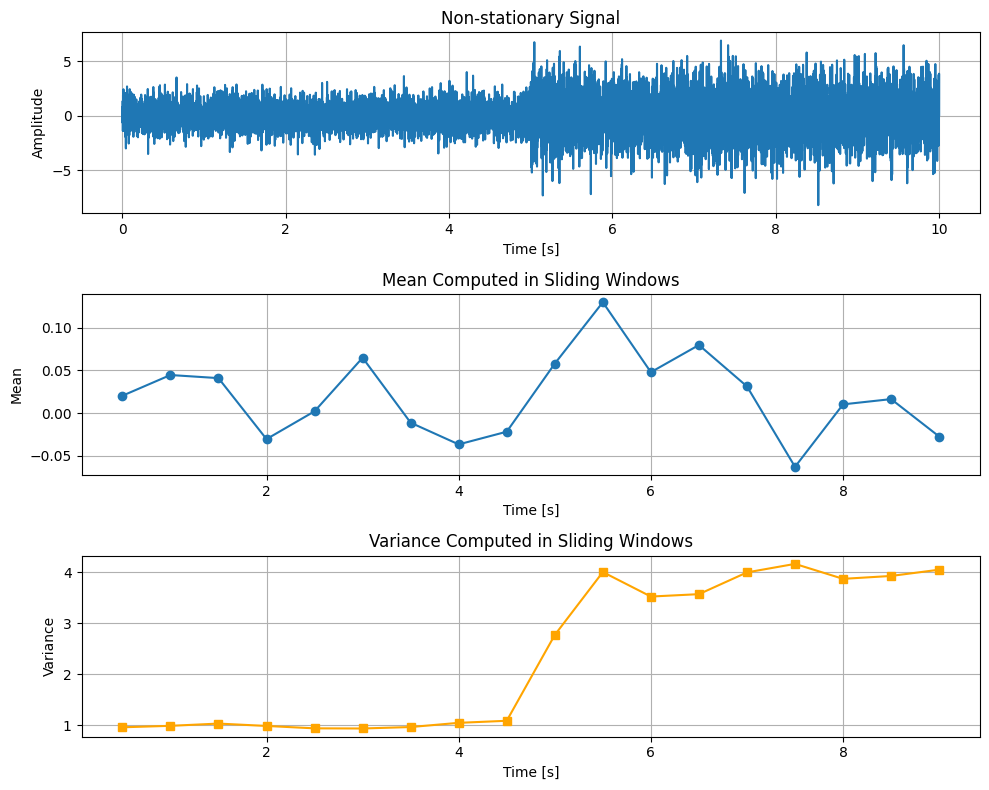

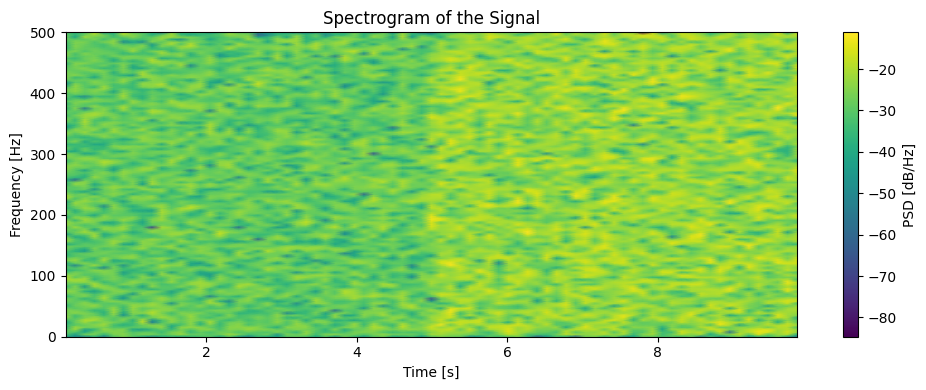

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

N = 10000
fs = 1000

signal = np.concatenate([
    np.random.normal(0, 1, N // 2),
    np.random.normal(0, 2, N // 2)
])
time = np.arange(N) / fs

window_size = 1000
step = 500
positions = []
means = []
variances = []

for start in range(0, N - window_size, step):
    window = signal[start:start + window_size]
    positions.append(start + window_size // 2)
    means.append(np.mean(window))
    variances.append(np.var(window))

plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(time, signal)
plt.title("Non-stationary Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(np.array(positions) / fs, means, marker='o', linestyle='-')
plt.title("Mean Computed in Sliding Windows")
plt.xlabel("Time [s]")
plt.ylabel("Mean")
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(np.array(positions) / fs, variances, marker='s', color='orange', linestyle='-')
plt.title("Variance Computed in Sliding Windows")
plt.xlabel("Time [s]")
plt.ylabel("Variance")
plt.grid(True)

plt.tight_layout()
plt.show()

f, t_spec, Sxx = spectrogram(signal, fs=fs, window='hann', nperseg=256, noverlap=128)
plt.figure(figsize=(10, 4))
plt.pcolormesh(t_spec, f, 10 * np.log10(Sxx), shading='gouraud')
plt.title("Spectrogram of the Signal")
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [s]")
plt.colorbar(label='PSD [dB/Hz]')
plt.tight_layout()
plt.show()

# **Conclusions**

The results clearly indicate that the signal is non-stationary, as both the mean and variance change over time. This analysis demonstrates the importance of time-frequency methods in understanding signals with evolving statistical characteristics, which is relevant in applications such as biomedical signal processing and communications.